In [94]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Data Load

In [95]:
df = pd.read_csv('/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv')

In [96]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

In [98]:
# data_desc = pd.read_csv('/kaggle/input/co2-emission-by-vehicles/Data Description.csv')
# data_desc


In [99]:
#check first column for company that are made the car 
df['Make'].value_counts()

Make
FORD             628
CHEVROLET        588
BMW              527
MERCEDES-BENZ    419
PORSCHE          376
TOYOTA           330
GMC              328
AUDI             286
NISSAN           259
JEEP             251
DODGE            246
KIA              231
HONDA            214
HYUNDAI          210
MINI             204
VOLKSWAGEN       197
MAZDA            180
LEXUS            178
JAGUAR           160
CADILLAC         158
SUBARU           140
VOLVO            124
INFINITI         108
BUICK            103
RAM               97
LINCOLN           96
MITSUBISHI        95
CHRYSLER          88
LAND ROVER        85
FIAT              73
ACURA             72
MASERATI          61
ROLLS-ROYCE       50
ASTON MARTIN      47
BENTLEY           46
LAMBORGHINI       41
ALFA ROMEO        30
GENESIS           25
SCION             22
SMART              7
BUGATTI            3
SRT                2
Name: count, dtype: int64

In [100]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


In [101]:
# convdert object type column into numeric 
label_en = LabelEncoder()


df['Make'] = label_en.fit_transform(df['Make'])

df['Model'] = label_en.fit_transform(df['Model'])

df['Vehicle Class'] = label_en.fit_transform(df['Vehicle Class'])

df['Transmission'] = label_en.fit_transform(df['Transmission'])

df['Fuel Type'] = label_en.fit_transform(df['Fuel Type'])

In [102]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


# EDA

In [103]:
numeric_columns = df.select_dtypes(include=['number'])
numeric_columns.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='CO2 Emissions(g/km)', ylabel='Count'>

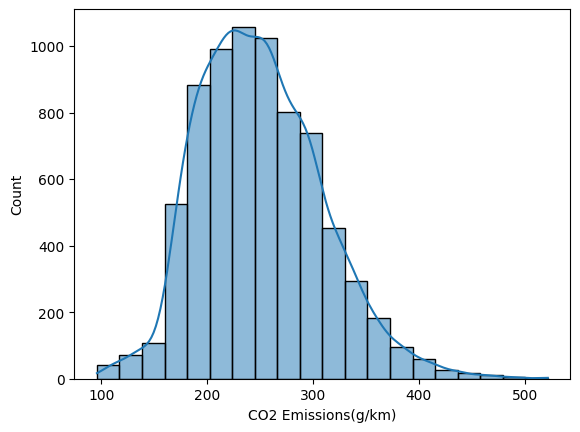

In [104]:
# check target column distribution 

sns.histplot(df['CO2 Emissions(g/km)'], bins=20, kde=True)

Text(0.5, 1.0, 'CO2 emission by Fuel Type')

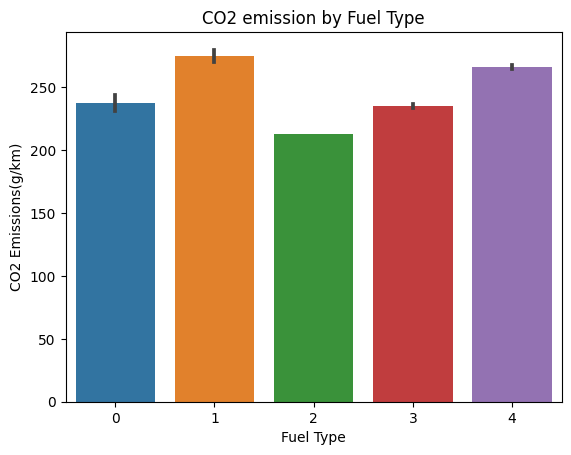

In [105]:
sns.barplot(x=df['Fuel Type'], y=df['CO2 Emissions(g/km)'])
plt.title("CO2 emission by Fuel Type")

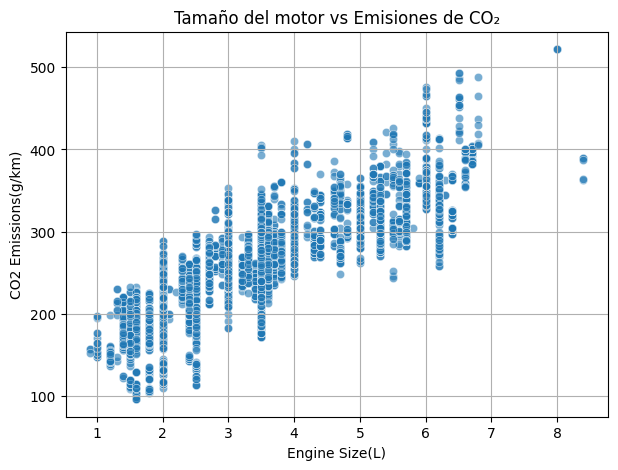

In [106]:
# Engine size vs. emissions
plt.figure(figsize=(7,5))
sns.scatterplot(x="Engine Size(L)", y="CO2 Emissions(g/km)", data=df, alpha=0.6)
plt.title("Tamaño del motor vs Emisiones de CO₂")
plt.grid()
plt.show()

<Axes: >

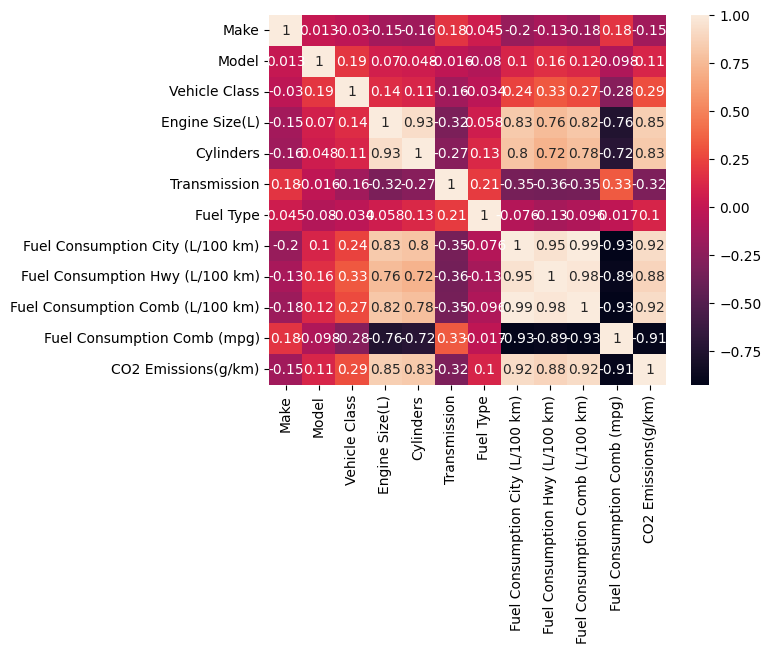

In [107]:
sns.heatmap( df.corr(), annot = True)

# Scalling 

In [108]:
X = df.drop(columns = ['CO2 Emissions(g/km)'])
y= df['CO2 Emissions(g/km)']
X

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg)
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27
...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29


In [109]:
X_train,X_test ,y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42)


In [110]:
X_train.shape

(5908, 11)

In [111]:
X_test.shape


(1477, 11)

In [112]:
# Standard Scalling 

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

# Modelling For Regression task 

Regression models
1 - linear regression 
2 - DecisiontreeRegressor
3 - RandomForestRegressor 
4 - KNeighborsRegressor 




In [113]:
lr = LinearRegression()
lr.fit(X_train_sc, y_train)

LinearRegression()

In [114]:
pred_lr = lr.predict(X_test_sc)

print("mean absolute Error : ", mean_absolute_error(pred_lr,y_test))
print("mean squared error :", mean_squared_error(pred_lr,y_test))
print("r2 score ",r2_score(pred_lr,y_test))


mean absolute Error :  11.17663002420695
mean squared error : 295.3046695124163
r2 score  0.9070710173646158


In [115]:
knn_reg = KNeighborsRegressor()

knn_reg.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [116]:
pred_knn = knn_reg.predict(X_test_sc)

print("mean absolute Error : ", mean_absolute_error(pred_knn,y_test))
print("mean squared error :", mean_squared_error(pred_knn,y_test))
print("r2 score ",r2_score(pred_knn,y_test))

mean absolute Error :  4.666756939742721
mean squared error : 45.91436696005417
r2 score  0.986087931961637


In [117]:
dt = DecisionTreeRegressor()
dt.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [118]:
pred_dt = dt.predict(X_test_sc)

print("mean absolute Error : ", mean_absolute_error(pred_dt,y_test))
print("mean squared error :", mean_squared_error(pred_dt,y_test))
print("r2 score ",r2_score(pred_dt,y_test))

mean absolute Error :  1.8167795080117355
mean squared error : 9.713879297374557
r2 score  0.997167084542354


In [119]:
rfr = RandomForestRegressor()

rfr.fit(X_train_sc, y_train)


RandomForestRegressor()

In [120]:
pred_rfr = rfr.predict(X_test_sc)

print("mean absolute Error : ", mean_absolute_error(pred_rfr,y_test))
print("mean squared error :", mean_squared_error(pred_rfr,y_test))
print("r2 score ",r2_score(pred_rfr,y_test))

mean absolute Error :  1.7981748100504014
mean squared error : 8.01746114258705
r2 score  0.9976614007169113


# Compare Performances of Models 

In [121]:
r2_scores = [  r2_score(pred_lr,y_test), r2_score(pred_knn,y_test),r2_score(pred_dt,y_test),r2_score(pred_rfr,y_test)]
models = ['Linear regression', 'KNeighborsRegressor', 'DecisionTreeRegressor', 'RandomForestRegressor']

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


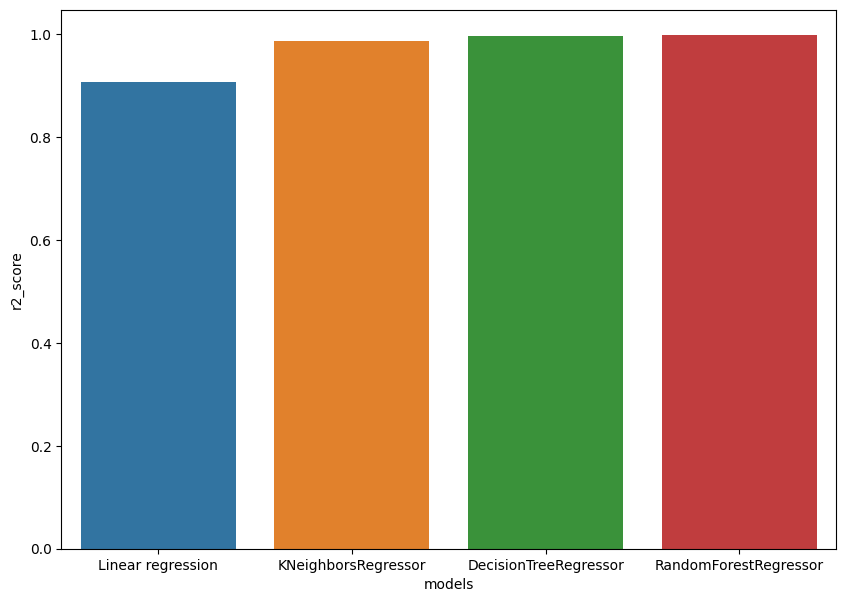

In [122]:
plt.figure(figsize=(10,7))
sns.barplot(x=models, y=r2_scores)
plt.xlabel("models")
plt.ylabel("r2_score")
plt.show()


# Creating Pipeline 

In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [144]:
numeric_columns = ['Engine Size(L)', 'Cylinders',
        'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'Fuel Consumption Comb (mpg)']
categorical_columns =['Transmission', 'Fuel Type']
numeric_columns


['Engine Size(L)',
 'Cylinders',
 'Fuel Consumption City (L/100 km)',
 'Fuel Consumption Hwy (L/100 km)',
 'Fuel Consumption Comb (L/100 km)',
 'Fuel Consumption Comb (mpg)']

In [154]:
from sklearn.preprocessing import OrdinalEncoder

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_columns),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_columns)
    ])

In [155]:
model_pipeline = Pipeline (
     steps=[
         ('preprocess', preprocessor),
         ('random_forest_regressor', rfr)
     ]
)

In [156]:
model_pipeline.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Engine Size(L)',
                                                   'Cylinders',
                                                   'Fuel Consumption City '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Hwy '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(L/100 km)',
                                                   'Fuel Consumption Comb '
                                                   '(mpg)']),
                                                 ('cat',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['Transmission',
                                                   'Fuel Type'])])),
                ('random_forest_regressor', RandomForestRegressor())])

In [157]:
# Example user input (must match your feature names)

user_input = pd.DataFrame([{
    'Engine Size(L)': 2.0,
    'Cylinders': 4,
    'Fuel Consumption Comb (L/100 km)': 7.5,
    'Fuel Type': 'Z',   # Example category (e.g., 'Z' = Regular Gasoline)
    'Transmission':'AS6' , # Example category
    'Fuel Consumption City (L/100 km)':10.4, 
    'Fuel Consumption Hwy (L/100 km)':6.7, 
    'Fuel Consumption Comb (mpg)': 25
}])

# Predict CO2 emission
predicted_emission = model_pipeline.predict(user_input)
print("Predicted CO2 Emission (g/km):", predicted_emission[0])

Predicted CO2 Emission (g/km): 204.22216666666662


# Save Pipeline 

In [158]:
import joblib

joblib.dump(model_pipeline, 'co2_rfr_pipeline.pkl')
print("✅ Pipeline saved successfully!")

✅ Pipeline saved successfully!
